## MongoDB 安装 与 测试

## Mac Mongo:

### 安装

#### 1. 安装HomeBrew $ ruby -e "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install)"

#### 2. brew update 更新

#### 3. 在Mac的终端中输入：$ brew install mongodb

#### 4. $ mkdir -p /data/db

#### 5. $ cd /usr/local/Cellar/mongodb/3.0.4/bin

#### 6. $ sudo ./mongod


## Windows Mongo：

### 安装

#### 1. 登陆DB官网：http://www.mongodb.org/MongoDB
#### 2. 下载在官网 Download 页面
#### 3. 安装mongoDB2
#### 4. 在mongdb安装后的 bin文件夹 同级目录 建立data文件夹，data文件夹下再建立db，log文件夹，再在log文件夹下新建mongod.log

### 运行

#### 1、运行cmdline
#### 2、进入 mongoDB 的bin目录
#### 3、> mongod -dbpath "新建db文件夹路径"
#### 4、在bin目录下打开mongo.exe


In [1]:
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline
plt.figure(figsize=(200,400))
img=mpimg.imread('Datasets/check_env.png')
imgplot = plt.imshow(img)
plt.show()


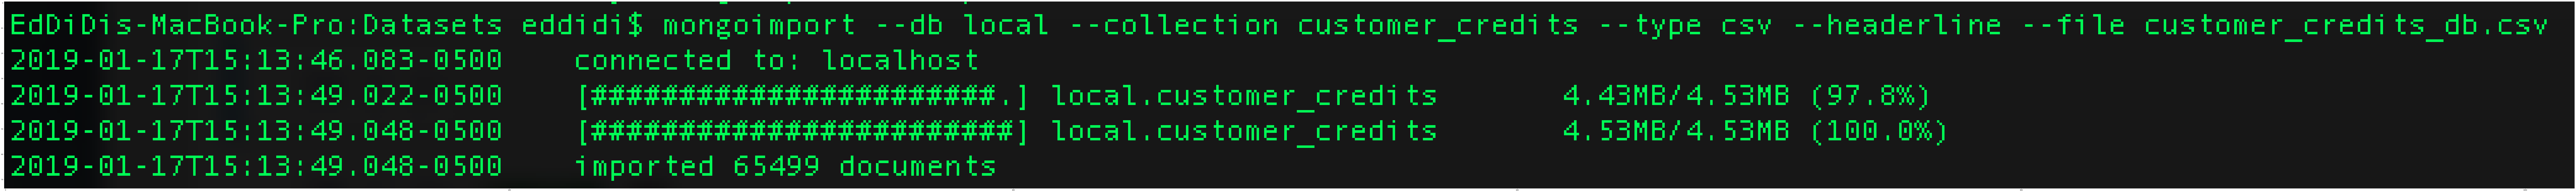

In [2]:
plt.figure(figsize=(300,400))
img=mpimg.imread('Datasets/load1.png')
imgplot = plt.imshow(img)
plt.show()


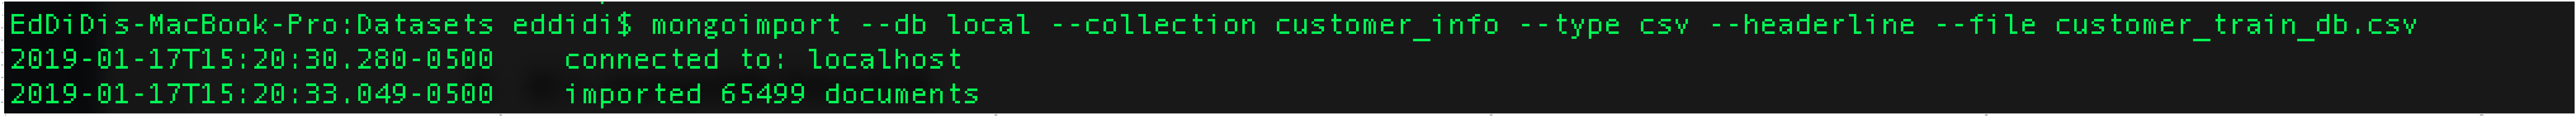

In [3]:
plt.figure(figsize=(300,400))
img=mpimg.imread('Datasets/load2.png')
imgplot = plt.imshow(img)
plt.show()


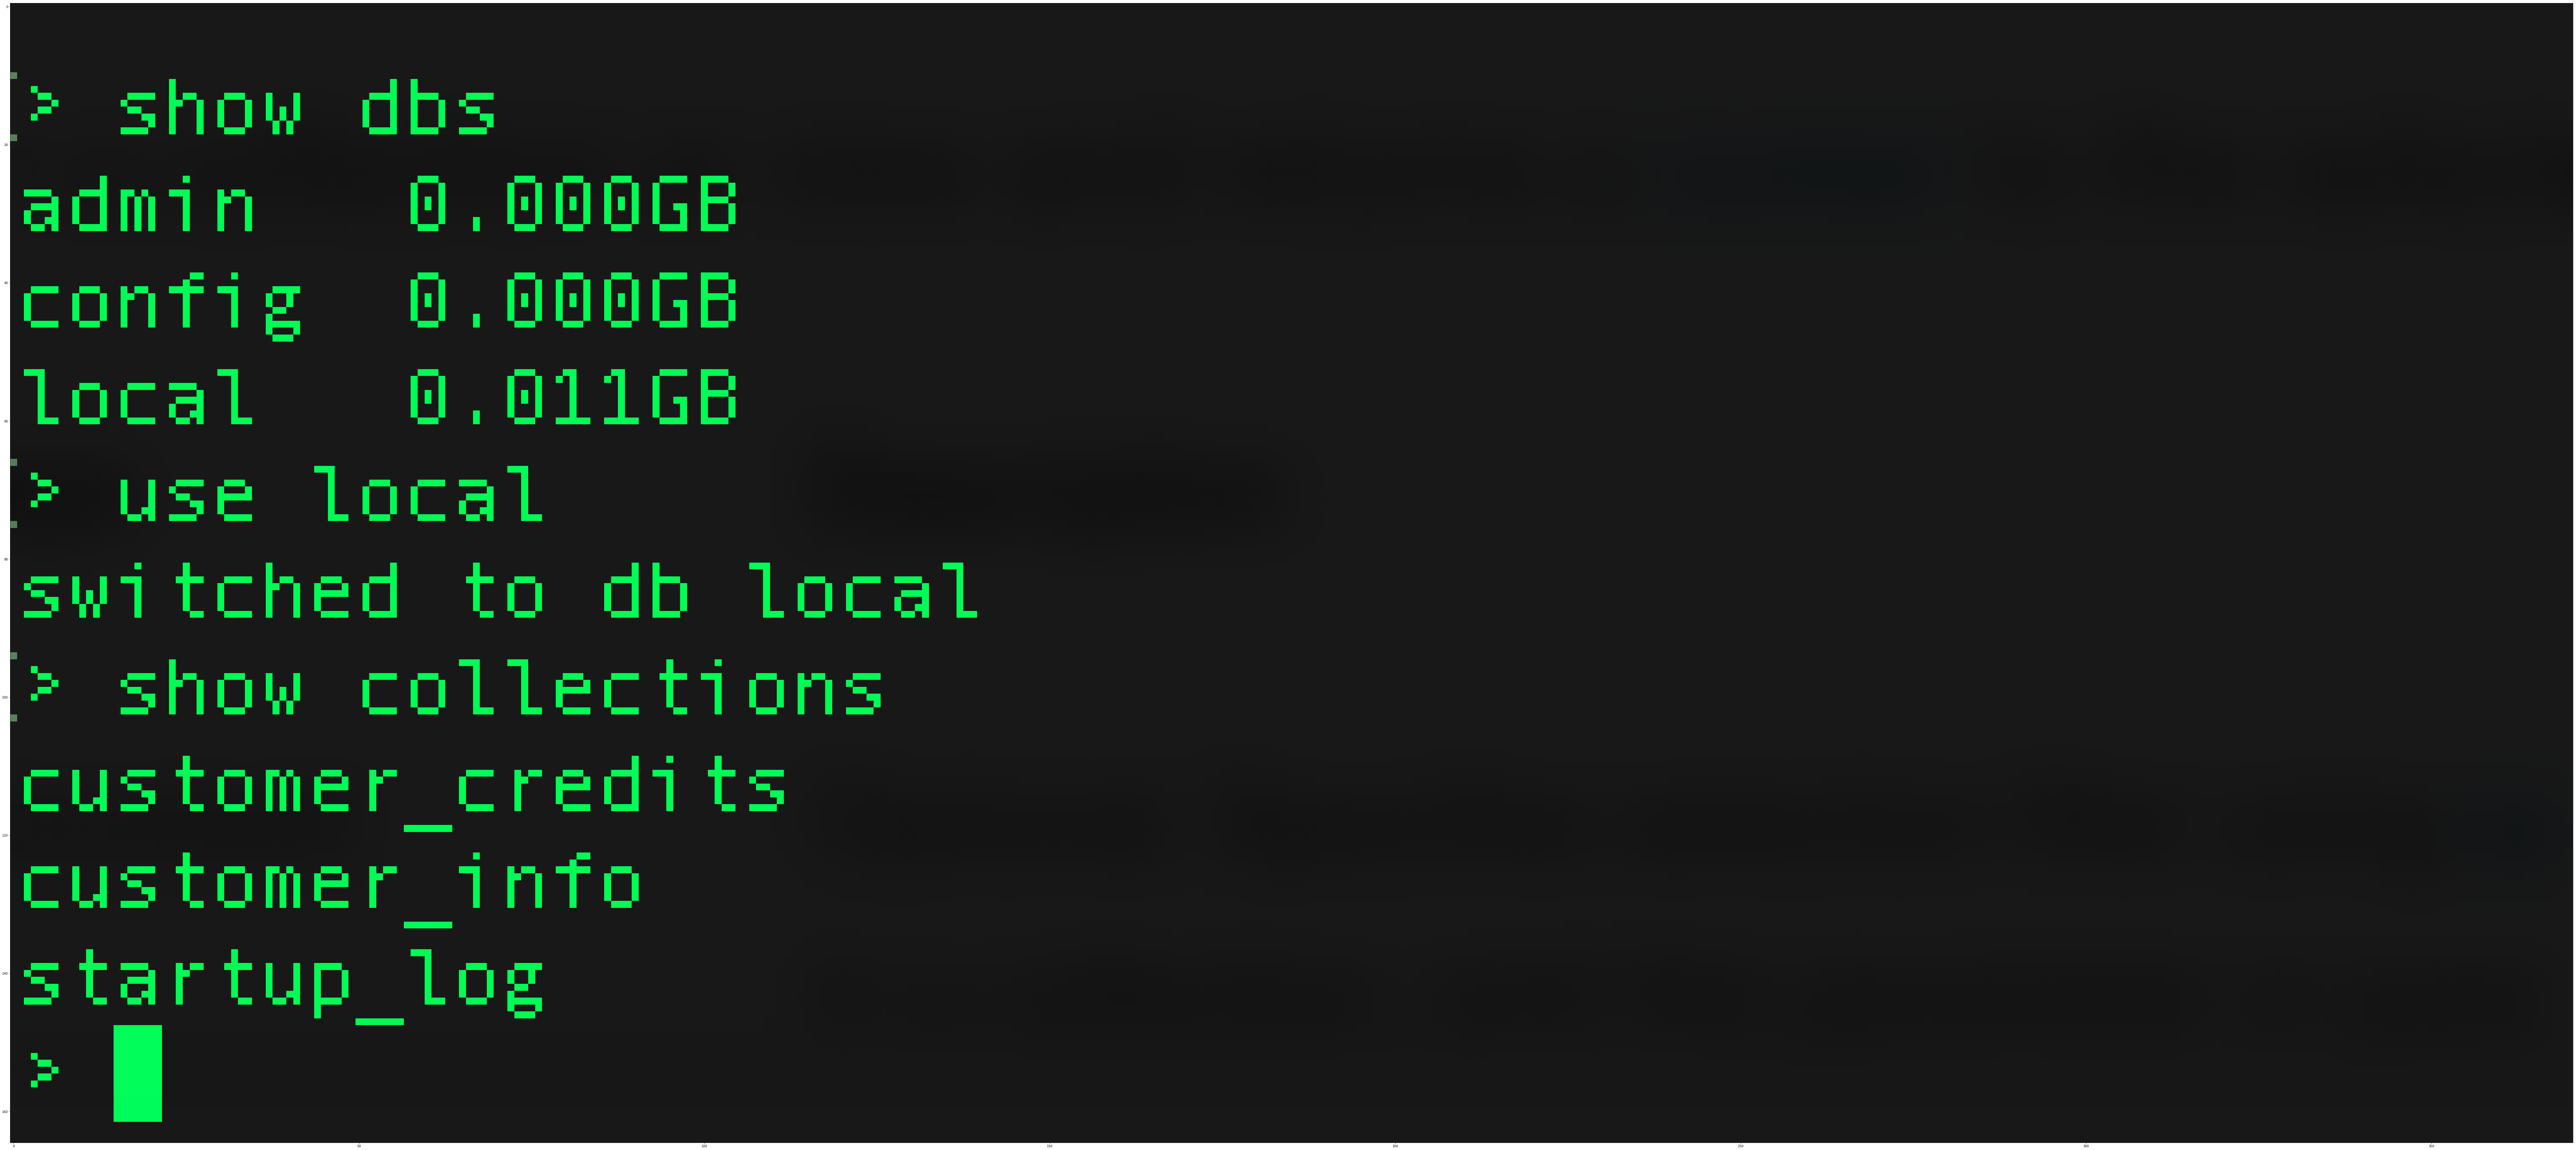

In [4]:
plt.figure(figsize=(150,200))
img=mpimg.imread('Datasets/show.png')
imgplot = plt.imshow(img)
plt.show()


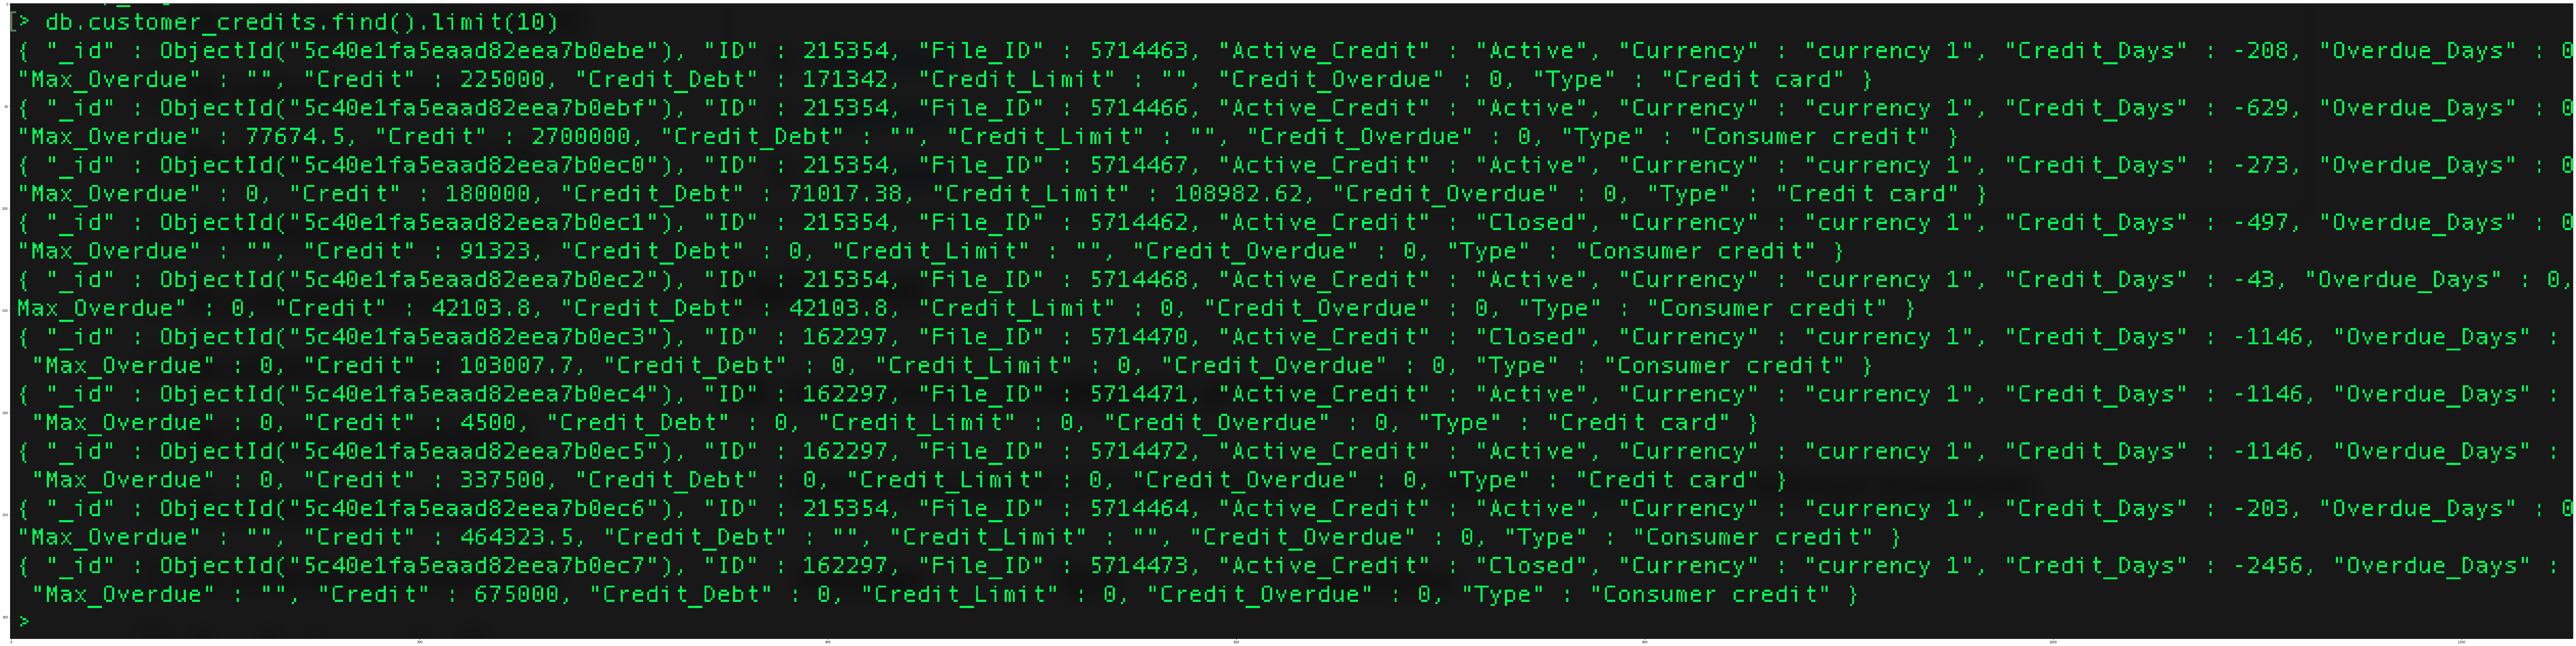

In [5]:
plt.figure(figsize=(150,200))
img=mpimg.imread('Datasets/get_collection.png')
imgplot = plt.imshow(img)
plt.show()


In [1]:
import os
import pickle
import pymongo

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pymongo import MongoClient
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold

client=MongoClient('mongodb://localhost',27017)
print("Checking schema ... ")
print("")
print("The databse has the following databases:")

for db in client.database_names():
    print("Database: "+db)

print("")
print("The databse has the following collections:")
db=client.local
for coll in db.collection_names():
    print("Collection name: "+coll)


Checking schema ... 

The databse has the following databases:
Database: admin
Database: config
Database: local
Database: temp

The databse has the following collections:
Collection name: temp
Collection name: startup_log
Collection name: customer_info
Collection name: customer_credits


/Users/eddidi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: database_names is deprecated. Use list_database_names instead.
/Users/eddidi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: DeprecationWarning: collection_names is deprecated. Use list_collection_names instead.


In [2]:
train_raw=db.customer_info.find()
credit_raw=db.customer_credits.find()

new_df3=pd.DataFrame([row for row in train_raw])
credit=pd.DataFrame([row for row in credit_raw])



In [5]:
new_df3.head(n=10)



,Amount_Credit,Annuity,Birth_Day_CNT,Car_Age,Default,Employed_Day_CNT,Gender,ID,Income,Num_of_Child,Own_Car,Own_Residence,Price,Region_Population_Factor,Registration_Day_CNT,_id
0,450000.0,12375,-19454,,0,-899,F,150009,46566.0,0,N,N,450000,0.028663,-3224,5c40e38e5eaad82eea7c0ee0
1,295168.5,15201,-16139,,0,-2180,F,247486,76500.0,0,N,Y,238500,0.010556,-3410,5c40e38e5eaad82eea7c0ee1
2,445333.5,47961,-10681,5,0,-1921,M,353539,180000.0,1,Y,Y,423000,0.018801,-598,5c40e38e5eaad82eea7c0ee2
3,284400.0,13387.5,-10971,,0,-426,M,105812,144000.0,0,N,Y,225000,0.010147,-6267,5c40e38e5eaad82eea7c0ee3
4,900000.0,45954,-19430,,0,-805,M,164890,162000.0,0,N,N,900000,0.006008,-4366,5c40e38e5eaad82eea7c0ee4
5,713889.0,43803,-15666,5,0,365243,F,102316,270000.0,2,Y,Y,661500,0.072508,-3215,5c40e38e5eaad82eea7c0ee5
6,603000.0,24556.5,-11516,,0,-4165,F,304225,126000.0,0,N,N,603000,0.035792,-5522,5c40e38e5eaad82eea7c0ee6
7,769500.0,27391.5,-14247,5,0,-2436,F,410579,247500.0,0,Y,Y,769500,0.026392,-8292,5c40e38e5eaad82eea7c0ee7
8,284400.0,13387.5,-15615,1,0,-3459,F,127087,94500.0,0,Y,N,225000,0.031329,-4733,5c40e38e5eaad82eea7c0ee8
9,756000.0,22234.5,-17106,,0,-8438,F,446165,247500.0,0,N,Y,756000,0.026392,-7502,5c40e38e5eaad82eea7c0ee9


In [6]:
credit.head(n=10)



,Active_Credit,Credit,Credit_Days,Credit_Debt,Credit_Limit,Credit_Overdue,Currency,File_ID,ID,Max_Overdue,Overdue_Days,Type,_id
0,Active,225000.00,-208,171342,,0.0,currency 1,5714463,215354,,0,Credit card,5c45c41e29faaf057b58e91d
1,Active,90000.00,-203,,,0.0,currency 1,5714465,215354,,0,Credit card,5c45c41e29faaf057b58e91e
2,Closed,91323.00,-497,0,,0.0,currency 1,5714462,215354,,0,Consumer credit,5c45c41e29faaf057b58e91f
3,Active,180000.00,-273,71017.4,108983,0.0,currency 1,5714467,215354,0,0,Credit card,5c45c41e29faaf057b58e920
4,Active,2700000.00,-629,,,0.0,currency 1,5714466,215354,77674.5,0,Consumer credit,5c45c41e29faaf057b58e921
5,Active,42103.80,-43,42103.8,0,0.0,currency 1,5714468,215354,0,0,Consumer credit,5c45c41e29faaf057b58e922
6,Closed,76878.45,-1896,0,0,0.0,currency 1,5714469,162297,14985,0,Consumer credit,5c45c41e29faaf057b58e923
7,Closed,103007.70,-1146,0,0,0.0,currency 1,5714470,162297,0,0,Consumer credit,5c45c41e29faaf057b58e924
8,Active,464323.50,-203,,,0.0,currency 1,5714464,215354,,0,Consumer credit,5c45c41e29faaf057b58e925
9,Active,4500.00,-1146,0,0,0.0,currency 1,5714471,162297,0,0,Credit card,5c45c41e29faaf057b58e926


In [7]:
new_df3.shape



(65499, 16)

In [8]:
credit.shape



(65499, 13)

In [9]:
new_df3.dtypes



Amount_Credit               float64
Annuity                      object
Birth_Day_CNT                 int64
Car_Age                      object
Default                       int64
Employed_Day_CNT              int64
Gender                       object
ID                            int64
Income                      float64
Num_of_Child                  int64
Own_Car                      object
Own_Residence                object
Price                        object
Region_Population_Factor    float64
Registration_Day_CNT          int64
_id                          object
dtype: object

In [10]:
def conv_obj(itm):
    try:
        return float(itm)
    except:
        return 0


In [11]:
new_df3['Annuity']=new_df3['Annuity'].apply(conv_obj)
new_df3['Price']=new_df3['Price'].apply(conv_obj)


In [12]:
client.close()
new_df3['Employed_Day_CNT'] = (new_df3['Employed_Day_CNT'].apply(lambda x: x if x != 365243 else np.nan))
new_df3['Income/Credit_perc'] = new_df3['Income'] / new_df3['Amount_Credit']
new_df3['Annuity/Income_perc'] = (new_df3['Annuity'] / (1.0+new_df3['Income']))**0.5
new_df3['Payment_rate'] = new_df3['Annuity'] / new_df3['Amount_Credit']
new_df3['Loan/Income_ratio'] = new_df3['Amount_Credit'] / new_df3['Income']
new_df3['Credits/Goods_ratio'] = new_df3['Amount_Credit'] / new_df3['Price']
new_df3=new_df3.drop(columns=['_id'],axis=1)



In [13]:
new_df3.head(n=10)



,Amount_Credit,Annuity,Birth_Day_CNT,Car_Age,Default,Employed_Day_CNT,Gender,ID,Income,Num_of_Child,Own_Car,Own_Residence,Price,Region_Population_Factor,Registration_Day_CNT,Income/Credit_perc,Annuity/Income_perc,Payment_rate,Loan/Income_ratio,Credits/Goods_ratio
0,450000.0,12375.0,-19454,,0,-899.0,F,150009,46566.0,0,N,N,450000.0,0.028663,-3224,0.103480,0.515506,0.027500,9.663703,1.000000
1,295168.5,15201.0,-16139,,0,-2180.0,F,247486,76500.0,0,N,Y,238500.0,0.010556,-3410,0.259174,0.445761,0.051499,3.858412,1.237604
2,445333.5,47961.0,-10681,5,0,-1921.0,M,353539,180000.0,1,Y,Y,423000.0,0.018801,-598,0.404191,0.516187,0.107697,2.474075,1.052798
3,284400.0,13387.5,-10971,,0,-426.0,M,105812,144000.0,0,N,Y,225000.0,0.010147,-6267,0.506329,0.304907,0.047073,1.975000,1.264000
4,900000.0,45954.0,-19430,,0,-805.0,M,164890,162000.0,0,N,N,900000.0,0.006008,-4366,0.180000,0.532602,0.051060,5.555556,1.000000
5,713889.0,43803.0,-15666,5,0,NaN,F,102316,270000.0,2,Y,Y,661500.0,0.072508,-3215,0.378210,0.402781,0.061358,2.644033,1.079197
6,603000.0,24556.5,-11516,,0,-4165.0,F,304225,126000.0,0,N,N,603000.0,0.035792,-5522,0.208955,0.441465,0.040724,4.785714,1.000000
7,769500.0,27391.5,-14247,5,0,-2436.0,F,410579,247500.0,0,Y,Y,769500.0,0.026392,-8292,0.321637,0.332674,0.035596,3.109091,1.000000
8,284400.0,13387.5,-15615,1,0,-3459.0,F,127087,94500.0,0,Y,N,225000.0,0.031329,-4733,0.332278,0.376384,0.047073,3.009524,1.264000
9,756000.0,22234.5,-17106,,0,-8438.0,F,446165,247500.0,0,N,Y,756000.0,0.026392,-7502,0.327381,0.299727,0.029411,3.054545,1.000000


In [14]:
new_df3.dtypes



Amount_Credit               float64
Annuity                     float64
Birth_Day_CNT                 int64
Car_Age                      object
Default                       int64
Employed_Day_CNT            float64
Gender                       object
ID                            int64
Income                      float64
Num_of_Child                  int64
Own_Car                      object
Own_Residence                object
Price                       float64
Region_Population_Factor    float64
Registration_Day_CNT          int64
Income/Credit_perc          float64
Annuity/Income_perc         float64
Payment_rate                float64
Loan/Income_ratio           float64
Credits/Goods_ratio         float64
dtype: object

In [15]:
credit.dtypes



Active_Credit      object
Credit            float64
Credit_Days         int64
Credit_Debt        object
Credit_Limit       object
Credit_Overdue    float64
Currency           object
File_ID             int64
ID                  int64
Max_Overdue        object
Overdue_Days        int64
Type               object
_id                object
dtype: object

In [16]:
credit['Credit']=credit['Credit'].apply(conv_obj)
credit['Credit_Debt']=credit['Credit_Debt'].apply(conv_obj)
credit['Credit_Limit']=credit['Credit_Limit'].apply(conv_obj)
credit['Max_Overdue']=credit['Max_Overdue'].apply(conv_obj)
credit=credit.drop(columns=['_id'],axis=1)


In [17]:
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object' and col!='_id']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

num_aggregations = {
    'Credit_Days': ['max', 'mean'],
    'Overdue_Days': ['max', 'mean'],
    'Max_Overdue': ['max', 'mean'],
    'Credit': ['median'],
    'Credit_Debt': ['mean'],
    'Credit_Overdue': ['max', 'mean']}
cat_aggregations = {}
new_bureau, bureau_cat = one_hot_encoder(credit, True)
for cat in bureau_cat: cat_aggregations[cat] = ['median']
    
bureau_agg = new_bureau.groupby('ID').agg({**num_aggregations, **cat_aggregations})
bureau_agg.columns = pd.Index(['BURO_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])
# Bureau: Active credits - using only numerical aggregations
active = new_bureau[new_bureau['Active_Credit_Active'] == 1]
active_agg = active.groupby('ID').agg(num_aggregations)
active_agg.columns = pd.Index(['ACTIVE_' + e[0] + "_" + e[1].upper() for e in active_agg.columns.tolist()])


In [18]:
bureau_agg=bureau_agg.reset_index()
active_agg=active_agg.reset_index()
bureau_agg = bureau_agg.merge(active_agg, how='left', on='ID')
for bin_feature in ['Gender', 'Own_Car']:
    new_df3[bin_feature], uniques = pd.factorize(new_df3[bin_feature])
new_df3, cat_cols = one_hot_encoder(new_df3, True)
raw_agg = new_df3.merge(bureau_agg, how='left', on='ID')
raw_agg=raw_agg.fillna(0)
train_df=raw_agg


In [19]:
import gc
folds = StratifiedKFold(n_splits= 5, shuffle=True, random_state=42)
oof_preds = np.zeros(train_df.shape[0])
feature_importance_df = pd.DataFrame()
feats = [f for f in train_df.columns if f not in ['Default','ID','File_ID','index']]
    
for n_fold, (train_idx, valid_idx) in enumerate(folds.split(train_df[feats], train_df['Default'])):
    train_x, train_y = train_df[feats].iloc[train_idx], train_df['Default'].iloc[train_idx]
    valid_x, valid_y = train_df[feats].iloc[valid_idx], train_df['Default'].iloc[valid_idx]

    clf = LGBMClassifier(boosting_type='goss',nthread=4,n_estimators=2000,learning_rate=0.003,
        num_leaves=300,colsample_bytree=0.70,subsample=0.85,max_depth=10, reg_alpha=0.00,metric='binary_logloss',
        reg_lambda=0.00,min_child_weight=30,silent=-1,verbose=1)

    clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], eval_metric= 'auc', verbose= 100, early_stopping_rounds= 30)

    oof_preds[valid_idx] = clf.predict_proba(valid_x, num_iteration=clf.best_iteration_)[:, 1]
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = feats
    fold_importance_df["importance"] = clf.feature_importances_
    fold_importance_df["fold"] = n_fold + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(valid_y, oof_preds[valid_idx])))
    gc.collect()

print('Full AUC score %.6f' % roc_auc_score(train_df['Default'], oof_preds))

Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[37]	training's auc: 0.729576	valid_1's auc: 0.669025
Fold  1 AUC : 0.669025
Training until validation scores don't improve for 30 rounds.
[100]	training's auc: 0.735425	valid_1's auc: 0.673056
Early stopping, best iteration is:
[80]	training's auc: 0.735549	valid_1's auc: 0.674428
Fold  2 AUC : 0.674428
Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[39]	training's auc: 0.731303	valid_1's auc: 0.666644
Fold  3 AUC : 0.666644
Training until validation scores don't improve for 30 rounds.
[100]	training's auc: 0.736988	valid_1's auc: 0.658482
Early stopping, best iteration is:
[136]	training's auc: 0.738892	valid_1's auc: 0.659186
Fold  4 AUC : 0.659186
Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[45]	training's auc: 0.731504	valid_1's auc: 0.670329
Fold  5 AUC : 0.670329
Full AUC score 0.66

In [14]:
client=MongoClient('mongodb://localhost',27017)
db=client.temp
[row for row in db.temp.find()]

[{'_id': ObjectId('5c49d7bf039753f522949e81'), 'id': '10001', 'online': 1.0},
 {'_id': ObjectId('5c49d7c3039753f522949e82'), 'id': '10002', 'online': 0.0},
 {'_id': ObjectId('5c49d7c5039753f522949e83'), 'id': '10003', 'online': 0.0}]

In [17]:
db.temp.update({'id':'10003'},{'$set':{'online':2.0}})

/Users/eddidi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: update is deprecated. Use replace_one, update_one or update_many instead.
  """Entry point for launching an IPython kernel.


{'n': 1, 'nModified': 1, 'ok': 1.0, 'updatedExisting': True}

In [18]:
[row for row in db.temp.find()]

[{'_id': ObjectId('5c49d7bf039753f522949e81'), 'id': '10001', 'online': 1.0},
 {'_id': ObjectId('5c49d7c3039753f522949e82'), 'id': '10002', 'online': 0.0},
 {'_id': ObjectId('5c49d7c5039753f522949e83'), 'id': '10003', 'online': 2.0}]

In [19]:
db.temp.insert({"id":"10004"})

/Users/eddidi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  """Entry point for launching an IPython kernel.


ObjectId('5c49f9d73bcd401a1720a8ca')

In [20]:
[row for row in db.temp.find()]

[{'_id': ObjectId('5c49d7bf039753f522949e81'), 'id': '10001', 'online': 1.0},
 {'_id': ObjectId('5c49d7c3039753f522949e82'), 'id': '10002', 'online': 0.0},
 {'_id': ObjectId('5c49d7c5039753f522949e83'), 'id': '10003', 'online': 2.0},
 {'_id': ObjectId('5c49f9d73bcd401a1720a8ca'), 'id': '10004'}]

In [21]:
db.temp.insert({"id":"10005",'online':0.0})

/Users/eddidi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  """Entry point for launching an IPython kernel.


ObjectId('5c49f9f33bcd401a1720a8cb')

In [22]:
[row for row in db.temp.find()]

[{'_id': ObjectId('5c49d7bf039753f522949e81'), 'id': '10001', 'online': 1.0},
 {'_id': ObjectId('5c49d7c3039753f522949e82'), 'id': '10002', 'online': 0.0},
 {'_id': ObjectId('5c49d7c5039753f522949e83'), 'id': '10003', 'online': 2.0},
 {'_id': ObjectId('5c49f9d73bcd401a1720a8ca'), 'id': '10004'},
 {'_id': ObjectId('5c49f9f33bcd401a1720a8cb'), 'id': '10005', 'online': 0.0}]

In [24]:
db.temp.find({"id":"10001"})[0].keys()

dict_keys(['_id', 'id', 'online'])

In [2]:
temp=open("mongod.log","w")
temp.write(" ")
temp.close()